image1 size:  (139, 284, 3)


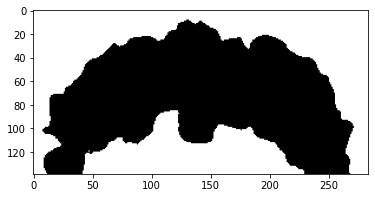

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

flower=cv2.imread("flower.png")      #download flower picture from the repository

flower=flower[1:140,:]
plt.imshow(cv2.cvtColor(flower,2))

print("image1 size: ", flower.shape)

zero=np.zeros((flower.shape[0],flower.shape[1],3),dtype="uint8")
flower_thresh=flower.copy()
for i in range(flower.shape[0]):
    for j in range(flower.shape[1]):
        if(flower[i][j][0]<10 and flower[i][j][1]<10 and flower[i][j][2]<10):
            ;
        else:
            flower_thresh[i][j]=[255,255,255]
flower_thresh_not=cv2.bitwise_not(flower_thresh)
plt.imshow(cv2.cvtColor(flower_thresh_not,2))

cap=cv2.VideoCapture(0)
while(True):
    a,img=cap.read()
    gray=cv2.cvtColor(img,1)
    faces=face_cascade.detectMultiScale(gray,3,10)
    for (x,y,w,h) in faces:
        img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        if(y>199):
            roi=img[y-flower.shape[0]:y,x:x+flower.shape[1]]
            flower_or=cv2.bitwise_and(roi,flower_thresh_not)
            flower_and=cv2.add(flower_or,flower)
            img[y-flower.shape[0]:y,x:x+flower.shape[1]]=flower_and
    cv2.imshow("Pink Flower Crown",img)
    if(cv2.waitKey(1)&0xff==27):
        break
cap.release()
cv2.destroyAllWindows()